# Comparing the Performance of Different Classifiers 

In this example, you will compare different classifiers on the simple hand-written digits dataset.
The dataset has different digits that we would like our model to be able to classify. It is not the famous MNIST dataset. It is an 8x8 images which is easier to handle. Specifically the exercise helps us to understand the capabilities of simple but effective classifiers that are suitable to be used online due to their efficiency.

**Learning Outcomes**
1. Appreciate the simplicity but effectiveness of the Perceptron
2. Compare its performance with other classifiers such as the Logistic Regression


In [1]:
%matplotlib inline


# Comparing various online solvers

An example showing how different online solvers perform on the hand-written digits dataset.


In [1]:
# Author: Rob Zinkov <rob at zinkov dot com>
# License: BSD 3 clause
# Modified by Abdulrahman Altahhan

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

In [2]:
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
X, y = datasets.load_digits(return_X_y=True)

Prepare or initialise the classifiers

In [5]:
classifiers = [
    ("Perceptron", Perceptron()),
    ("LogR", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))  # there is also regularisaition applied by default
]

training Perceptron
training LogR


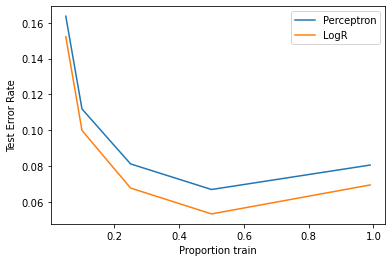

In [6]:
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()